<a href="https://colab.research.google.com/github/lamtruong2002/BaitapAItuan10/blob/main/nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


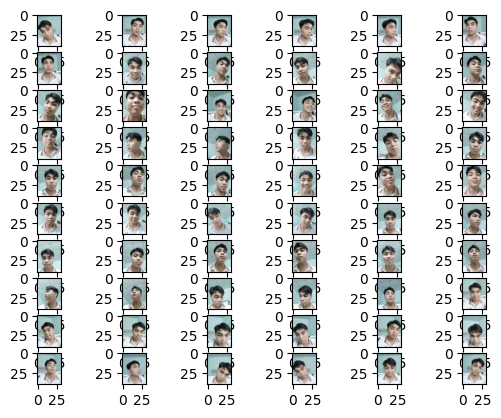

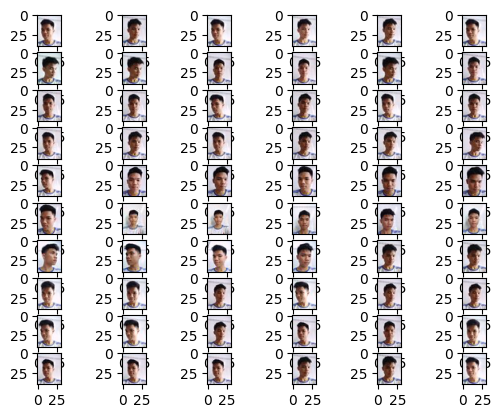

In [ ]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
folder1='/content/drive/MyDrive/HOCAI/hinh'
folder2='/content/drive/MyDrive/HOCAI/HO_DANG_TU_20146150'
images = []
labels = []
for i in range(60):
  plt.subplot(10,6,i+1)
  filename1=folder1+'/T('+str(i+1)+').jpg'
  img=imread(filename1)
  images.append(img)
  labels.append(1)
  plt.imshow(img)
plt.show()
for i in range(60):
  plt.subplot(10,6,i+1)
  filename2=folder2+'/H('+str(i+1)+').jpg'
  img=imread(filename2)
  images.append(img)
  labels.append(0)
  plt.imshow(img)
plt.show()



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
images = np.array(images)
labels = np.array(labels)
x_train,x_test,y_train, y_test=train_test_split(images,labels,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)


(96, 40, 30, 3)
(96,)


In [ ]:
from typing_extensions import assert_type
x_train=x_train.reshape(96,30*40*3)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(24,30*40*3)
x_test=x_test.astype('float32')/255

from keras.utils import to_categorical
y_train=to_categorical(y_train,2)
y_test=to_categorical(y_test,2)
print(x_train.shape)
print(y_train.shape)

(96, 3600)
(96, 2)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(48, input_shape = (30*40*3,), activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 48)                172848    
                                                                 
 dense_34 (Dense)            (None, 512)               25088     
                                                                 
 dense_35 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 198,962
Trainable params: 198,962
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics= 'accuracy')
model.fit(x_train, y_train, epochs = 100, batch_size= 128)
loss, acc = model.evaluate(x_test, y_test)
print(acc)
print(loss)

Epoch 1/100
1/1 [==============================] - 1s 673ms/step - loss: 0.6950 - accuracy: 0.5208
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 0.9977 - accuracy: 0.5208
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 3.6683 - accuracy: 0.4792
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 0.6893 - accuracy: 0.4792
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.5721 - accuracy: 0.6250
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5114 - accuracy: 0.9062
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.6782 - accuracy: 0.5208
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 0.7526 - accuracy: 0.4792
Epoch 9/100
1/1 [==============================] - 0s 17ms/step - loss: 0.5317 - accuracy: 0.5625
Epoch 10/100
1/1 [==============================] - 0s 19ms/step - loss: 0.4563 - accuracy: 0.9167
Epoch 11/100
1/1 [

1/1 [==============================] - 0s 175ms/step - loss: 0.0044 - accuracy: 1.0000
1.0
0.00441359169781208


In [ ]:
model.save('/content/drive/MyDrive/HOCAI/data/model1.h5')